In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/assertion3/assertion_cluster.csv


In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("/kaggle/input/assertionupdate/asssert.csv")
data
#sg=input("Message: ")

,Unnamed: 0,Questions,cluster
0,0,what is the assertions?,1
1,1,What is meant by assertions?,1
2,2,what is known as assertions?,1
3,3,describe the assertions?,1
4,4,what is assertion in system Verilog?,1
...,...,...,...
120,120,implication operators,12
121,121,what is implication operators?,12
122,122,what is meant by implication operators?,12
123,123,describe implication operator?,12


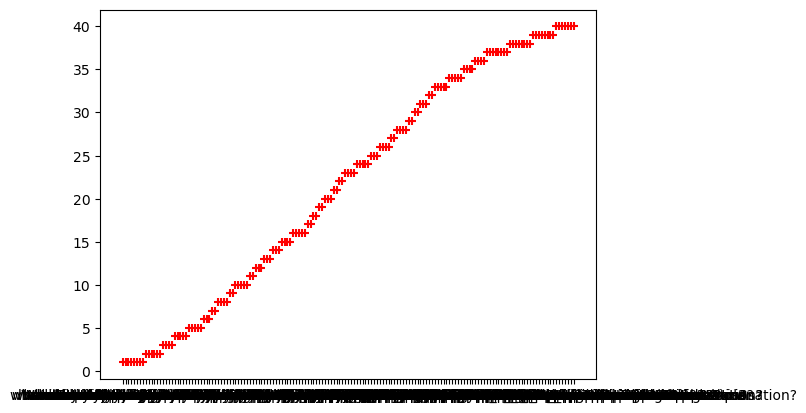

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(data.Questions,data.cluster,marker='+',color='red')

In [63]:
# Import required libraries
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer


# Split the dataset into features and target
X = data.drop('cluster', axis=1)
y = data['cluster']

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Split data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data["Questions"], data["cluster"], test_size=0.2, random_state=42)

# Create a CountVectorizer object to convert text to vectors
vectorizer = CountVectorizer()

# Convert the text to vectors
X_vectors = vectorizer.fit_transform(train_data)
X_vectors = vectorizer.fit_transform(test_data)

# Train a Linear Regression model
#lr = LinearRegression()
NB=MultinomialNB()
lr.fit(train_data, train_labels)

# Predict target values on the test set
y_pred = lr.predict(test_data)

# Calculate the mean squared error of the model
mse = mean_squared_error(test_labels, y_pred)
print("Mean Squared Error:", mse)


ValueError: could not convert string to float: 'What is the use of Intersection operator in assertions?'

In [2]:
!pip install sentence-transformers
import sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=3ffee65a17ff198f3b4d6651427238f7a8432757f40e79cc7de486f9f01cd1e9
  Stored in directory: /root/.cache/pip/wheels/83/71/2b/40d17d21937fed496fb99145227eca8f20b4891240ff60c86f
Successfully built sentence-transformers


In [3]:
import nltk
import string
import re
from sentence_transformers import SentenceTransformer
clean_data = []
for i in range(0,data.shape[0]):
    line = data['Questions'].iloc[i]
    line = line.lower()
    translator = str.maketrans('','',string.punctuation)
    line = line.translate(translator)
    line = " ".join(line.split())
    clean_data.append(line)
    print(line)

what is the assertions
what is meant by assertions
what is known as assertions
describe the assertions
what is assertion in system verilog
explain the assertions
assertions in system verilog
explain breifly about assertions
what is the role of assertions in sv
tell me about the assertions
assertions
importance of assertions
why are assertions are important to write a testebench
what are advantages of assertions
what are pros of assertions
what are the merits of assertions
what are the benefits of assertions
why it is necessary to write the assertions
can you explain why assertions are important
advantages of assertions
what is the importance of assertions in sv
merits of assertions
what are the uses of assertions
how can assertions be used
where we use assertions in system verilog
why do we need assertions in sv
where assertions can be used in sv
how to use assertions
in what way assertions can be used
does assertions are written in testbench
can we write assertions in design
uses of a

In [4]:
data['clean data']= clean_data

In [5]:
data

,Unnamed: 0,Questions,cluster,clean data
0,0,what is the assertions?,1,what is the assertions
1,1,What is meant by assertions?,1,what is meant by assertions
2,2,what is known as assertions?,1,what is known as assertions
3,3,describe the assertions?,1,describe the assertions
4,4,what is assertion in system Verilog?,1,what is assertion in system verilog
...,...,...,...,...
120,120,implication operators,12,implication operators
121,121,what is implication operators?,12,what is implication operators
122,122,what is meant by implication operators?,12,what is meant by implication operators
123,123,describe implication operator?,12,describe implication operator


In [6]:
embedder = SentenceTransformer('distilbert-base-nli-mean-tokens')

In [7]:
clean_data_embeddings = embedder.encode(clean_data)

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

In [8]:
clean_data_embeddings

array([[-0.32825997,  0.31902453,  0.07112201, ..., -0.4189667 ,
         0.2997102 , -0.29506025],
       [-0.11250944,  0.27206698,  0.17767704, ..., -0.37383834,
        -0.11758573, -0.24900082],
       [-0.20427114,  0.3365567 ,  0.09807373, ..., -0.2870723 ,
         0.04610155, -0.36798579],
       ...,
       [-0.31226996,  0.01765824,  0.01713088, ..., -0.25697187,
        -0.2527807 , -0.4239195 ],
       [-0.9466311 ,  0.15370254, -0.11829443, ..., -0.16384879,
        -0.21270256, -0.24036904],
       [-0.83849424, -0.26752293,  0.03119382, ..., -0.6432723 ,
         0.10500059,  0.48715213]], dtype=float32)

In [9]:
(clean_data_embeddings).shape
(clean_data_embeddings).ndim

2

In [10]:
df = pd.DataFrame(clean_data_embeddings)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.328260,0.319025,0.071122,0.588352,0.038370,-0.237011,1.036989,0.343115,0.036001,-0.223669,...,-0.801813,0.087545,0.566340,0.191800,-0.274503,-0.282749,0.375340,-0.418967,0.299710,-0.295060
1,-0.112509,0.272067,0.177677,0.444227,0.002725,-0.405301,1.272099,-0.101623,-0.120330,-0.274343,...,-0.818194,-0.057964,0.719412,0.405508,-0.086792,-0.374569,0.193973,-0.373838,-0.117586,-0.249001
2,-0.204271,0.336557,0.098074,0.241123,-0.063335,-0.452869,1.190633,0.099794,-0.182007,-0.164795,...,-0.498330,-0.162284,0.407960,0.532478,-0.266241,-0.439564,0.208267,-0.287072,0.046102,-0.367986
3,-0.160503,0.500776,0.110747,0.227627,0.020263,-0.473889,1.045544,0.213021,0.230004,-0.294309,...,-0.540335,-0.341845,0.594153,0.406284,-0.332447,-0.552111,0.175396,-0.128767,0.201757,-0.261935
4,-0.803752,-0.245543,0.269964,0.013109,-0.155176,-0.794969,1.210570,0.923080,-0.074008,-0.540685,...,-1.012636,-0.354375,0.462517,-0.058753,-0.341801,-0.213195,0.119873,-0.764199,0.148834,0.525699


In [11]:
df['cluster']=data['cluster']

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,cluster
0,-0.328260,0.319025,0.071122,0.588352,0.038370,-0.237011,1.036989,0.343115,0.036001,-0.223669,...,0.087545,0.566340,0.191800,-0.274503,-0.282749,0.375340,-0.418967,0.299710,-0.295060,1
1,-0.112509,0.272067,0.177677,0.444227,0.002725,-0.405301,1.272099,-0.101623,-0.120330,-0.274343,...,-0.057964,0.719412,0.405508,-0.086792,-0.374569,0.193973,-0.373838,-0.117586,-0.249001,1
2,-0.204271,0.336557,0.098074,0.241123,-0.063335,-0.452869,1.190633,0.099794,-0.182007,-0.164795,...,-0.162284,0.407960,0.532478,-0.266241,-0.439564,0.208267,-0.287072,0.046102,-0.367986,1
3,-0.160503,0.500776,0.110747,0.227627,0.020263,-0.473889,1.045544,0.213021,0.230004,-0.294309,...,-0.341845,0.594153,0.406284,-0.332447,-0.552111,0.175396,-0.128767,0.201757,-0.261935,1
4,-0.803752,-0.245543,0.269964,0.013109,-0.155176,-0.794969,1.210570,0.923080,-0.074008,-0.540685,...,-0.354375,0.462517,-0.058753,-0.341801,-0.213195,0.119873,-0.764199,0.148834,0.525699,1


In [13]:
# Import required libraries
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer

df = df.sample(frac=1, random_state=42)
# Split the dataset into features and target
X = df.drop('cluster', axis=1)
#X=  df['Questions']
Y = df['cluster']

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Split data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(X,Y, test_size=0.1, random_state=42)
train_data


,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
32,-0.270300,0.185661,-0.015593,0.111456,-0.260430,-0.511256,1.425159,-0.186795,-0.421817,-0.199760,...,-0.440223,-0.413462,0.038265,0.425787,-0.137730,-0.503198,0.024249,-0.290015,-0.158201,-0.381183
114,-0.142952,0.229480,0.889044,0.010042,0.195722,-0.082570,0.710599,0.200059,0.338559,-0.331455,...,-0.045265,-0.309966,0.719134,-0.732326,-0.086427,0.703210,-0.292720,-0.902320,0.177002,-1.146225
107,-0.704206,-0.358271,0.829593,-0.247230,0.362732,-0.284796,0.338855,0.618764,0.257644,-0.868332,...,0.411991,-0.083493,0.835902,-1.122677,-0.301586,0.579877,-0.189392,-0.613639,-0.137715,-1.271891
27,-0.422707,0.705097,-0.226096,0.335510,-0.108614,-0.444320,1.176055,-0.042938,0.570543,-0.067469,...,-0.494722,-0.331873,0.592561,0.472638,-0.205392,-0.415504,0.061960,-0.271853,0.387142,-0.135425
37,-0.481315,0.270943,-0.078295,-0.260064,-0.198881,-0.704131,1.151972,0.114288,-0.298829,-0.272369,...,-0.351953,-0.423365,-0.130142,0.682024,-0.239080,-0.358851,0.260067,-0.287714,-0.524823,-0.274097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,-0.315186,-0.088593,0.212649,0.325996,-0.046864,-0.424568,1.002071,-0.167049,-0.399467,-0.515573,...,-0.701055,-0.265838,0.395352,0.664464,-0.108257,-0.322990,-0.265309,-0.212114,0.062505,-0.904658
19,-0.444586,-0.134183,0.195947,0.339657,-0.440670,-0.626449,1.009959,-0.711344,-0.771741,-0.055998,...,-0.743386,-0.317727,0.516480,1.224610,-0.023783,-0.298737,-0.376888,0.074125,-0.088010,-0.760444
88,-0.367614,0.338771,-0.396597,-0.322299,0.003979,-0.181282,1.187209,0.684841,0.350266,-0.052580,...,-0.859438,-0.163056,-0.218994,0.708919,-0.305263,-0.271617,0.148160,-0.629697,-0.494972,-0.013063
65,-0.517314,-0.177114,0.441470,-0.182183,-0.460897,-0.544657,1.011253,0.770436,-0.483003,-0.453025,...,0.039305,-0.190235,0.604999,0.238212,0.113497,-0.122962,-0.121458,-0.339350,-0.125751,-1.176970


In [24]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
x_train_list=train_data.values.tolist()
x_train_list[0]
#plt.imshow(np.reshape(x_train_list[100],(32,24,1)))

assertion_img = []
for i in range(0,len(x_train_list)):
    assertion_img.append(np.reshape(x_train_list[i],(32,24,1)))

In [33]:
len(assertion_img)

112

In [38]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
# Define the CNN model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(32, (3, 3), input_shape=(32, 24, 1), activation='relu'))

# Add the pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))

# Add a second pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the flatten layer
model.add(Flatten())

# Add the fully connected layer
model.add(Dense(units=128, activation='relu'))

# Add the output layer
model.add(Dense(units=12, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on your dataset
model.fit(np.array(assertion_img), np.array(train_labels), epochs=20, batch_size=32)

# Evaluate the model on your test dataset
#test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Make predictions on new data
#predictions = model.predict(new_data)


Epoch 1/20


ValueError: in user code:

    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1083, in compute_loss
        y, y_pred, sample_weight, regularization_losses=self.losses
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/conda/lib/python3.7/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/opt/conda/lib/python3.7/site-packages/keras/losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/losses.py", line 2005, in categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis
    File "/opt/conda/lib/python3.7/site-packages/keras/backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 12) are incompatible


In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 22, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 9, 32)         9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 768)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [28]:
# Create a CountVectorizer object to convert text to vectors
#vectorizer = CountVectorizer()
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#classifier = LogisticRegression(random_state = 0)
#classifier.fit(xtrain, ytrain)
# Convert the text to vectors
#X_vectors = vectorizer.fit_transform(train_data)
#X_vectors = vectorizer.fit_transform(test_data)

# Train a Linear Regression model
lr = LogisticRegression(max_iter=1200,random_state=0)
#lr = KNeighborsClassifier(n_neighbors=5)
#lr = DecisionTreeClassifier(max_depth=10.2, random_state=21)
#lr = RandomForestClassifier(n_estimators=1200, random_state=42)
#lr = SVC(kernel='linear', C=1, random_state=42)
#lr=MultinomialNB()
#lr=GaussianNB
lr.fit(train_data, train_labels)

# Predict target values on the test set
y_pred = lr.predict(test_data)

# Calculate the mean squared error of the model
#mse = mean_squared_error(test_labels, y_pred)
#print("Mean Squared Error:", mse)
#score = accuracy_score(test_labels, y_pred)
(test_data).shape



(13, 768)

In [36]:
import tensorflow as tf

# Define your model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=128, activation='relu', input_shape=(768,)),
  tf.keras.layers.Dense(units=128, activation='relu', input_shape=(768,)),
    tf.keras.layers.Dense(units=128, activation='relu', input_shape=(768,)),
    tf.keras.layers.Dense(units=128, activation='relu', input_shape=(768,)),
   
  tf.keras.layers.Dense(units=41, activation='softmax')
])

# Print the summary of the model
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               98432     
                                                                 
 dense_29 (Dense)            (None, 128)               16512     
                                                                 
 dense_30 (Dense)            (None, 128)               16512     
                                                                 
 dense_31 (Dense)            (None, 128)               16512     
                                                                 
 dense_32 (Dense)            (None, 41)                5289      
                                                                 
Total params: 153,257
Trainable params: 153,257
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile your model with multi-class cross-entropy loss
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', # Use categorical cross-entropy loss
              metrics=['accuracy'])
# Train your model
model.fit(train_data,  tf.keras.utils.to_categorical(train_labels), epochs=50, batch_size=32)
loss, accuracy = model.evaluate(test_data,  tf.keras.utils.to_categorical(test_labels))

Epoch 1/50
5/5 [==============================] - 1s 7ms/step - loss: 3.7064 - accuracy: 0.0284
Epoch 2/50
5/5 [==============================] - 0s 6ms/step - loss: 3.4442 - accuracy: 0.1986
Epoch 3/50
5/5 [==============================] - 0s 5ms/step - loss: 3.1008 - accuracy: 0.3050
Epoch 4/50
5/5 [==============================] - 0s 6ms/step - loss: 2.7268 - accuracy: 0.2837
Epoch 5/50
5/5 [==============================] - 0s 6ms/step - loss: 2.3483 - accuracy: 0.3901
Epoch 6/50
5/5 [==============================] - 0s 5ms/step - loss: 2.0040 - accuracy: 0.4681
Epoch 7/50
5/5 [==============================] - 0s 6ms/step - loss: 1.6497 - accuracy: 0.5532
Epoch 8/50
5/5 [==============================] - 0s 6ms/step - loss: 1.3633 - accuracy: 0.6667
Epoch 9/50
5/5 [==============================] - 0s 6ms/step - loss: 1.0621 - accuracy: 0.7234
Epoch 10/50
5/5 [==============================] - 0s 6ms/step - loss: 0.8568 - accuracy: 0.8085
Epoch 11/50
5/5 [======================

In [ ]:
test_data

In [ ]:
test_labels

In [ ]:
df

In [82]:
test_labels.shape

(32,)

In [79]:
y_pred.shape
y_pred

array([16, 23, 12, 37, 27, 28, 33, 13,  1,  8, 20, 10,  6, 20,  5, 40, 35,
       24, 10, 10, 20, 40,  3, 38, 23, 40, 19, 14, 29,  4, 40,  5])

In [78]:
#y1=np.rint(y_pred)
y1

array([16., 23., 12., 37., 27., 28., 33., 13.,  1.,  8., 20., 10.,  6.,
       20.,  5., 40., 35., 24., 10., 10., 20., 40.,  3., 38., 23., 40.,
       19., 14., 29.,  4., 40.,  5.])

In [15]:
score = accuracy_score(test_labels, y_pred)
score

0.9230769230769231

In [16]:
y_pred = lr.predict(test_data)
y2 = np.rint(y_pred)
score = accuracy_score(test_labels, y_pred)
score

0.9230769230769231

In [86]:
test_labels.shape

(32,)

In [87]:
y_pred.shape

(125,)

In [38]:

msg=input("Message: ")
msg = msg.lower()
translator = str.maketrans('','',string.punctuation)
msg = msg.translate(translator)
msg = " ".join(msg.split())
msg
msgInput= embedder.encode(msg)
msg_2d = msgInput.reshape(1, 768)
#msgInput
y_pred = lr.predict(msg_2d)
y_pred
#(msg_2d).shape
#(clean_data_embeddings).ndim


Message:  different type


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

array([6])

In [8]:
from transformers import pipeline

# Load the GPT-2 model
generator = pipeline('text-generation', model='gpt2')

# Generate text
text = generator('What is python', max_length=100)[0]['generated_text']

print(text)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


What is python, and why does it differ from python in much the same way? It's almost as if Python's main advantage is that it has much easier code to write so far.

That's because python is actually quite unique in that it doesn't run code on the host OS or hardware directly; which means Python can't do much when you're playing with the OS, and it can't perform a lot of the functions you'd expect from Windows XP or later. Instead, you
